# Aula 5 - K-means - Determinação de K
## Relembrando o k-means

### Passo a passo

 O algoritmo do K-Means se utiliza de similaridades para conseguir agrupar os dados, seu funcionamento segue os seguintes passos:
  1) definir o número de grupos (clusters) que eu espero encontrar nos meus dados - Valor de **K**
  2) gerar **K** pontos aleatórios que representam os centróides de cada grupo
  3) atribuir um grupo para cada observação baseado na distância do centroid 
  4) atualizar os centroides dos clusters sendo o ponto médio  
Repete-se os itens 3 e 4 até:      
    - número máximo de iterações  
    - estabelecer uma tolerância sendo que: caso a variação dos centroides seja pequena o suficiente, entendemos que houve uma convergência

Mas como saber qual a quantidade ideal de grupos para realizar a clusterização?

## Método do cotovelo (Elbow method)

O método do cotovelo é a forma, a partir de uma representação gráfica, de identificar o valor ótimo de **K** no K-means. É tipicamente feito escolhendo um valor de K em que o "cotovelo" é criado.

> O método do cotovelo é uma forma gráfica de encontrar o valor ideal de **K** em um algoritmo de agrupamento k-means. O gráfico mostra os valores das somas dos quadrados das distâncias intra-clusters (WCSS) no eixo y correspondentes aos diferentes valores de K no eixo x. O valor de **K** ideal é o ponto do gráfico emq ue forma o "cotovelo".

### Na prática

O KMeans do scikit-learn já calcula o wcss pra gente e dá o nome de `inertia`. Existem dois pontos negativos que precisamos levar em consideração quanto a inércia:

1) A inércia é uma métrica que assume que seus clusters são convexos e isotrópicos, ou seja, se seus clusters são alongados ou de formato irregular essa é uma métrica ruim;
2) A inércia não é uma métrica normalizada, então se você tiver um espaço com muitas dimensões você provavelmente vai dar de cara com a “maldição da dimensionalidade” já que as distâncias ficam infladas em espaços com muitas dimensões.

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

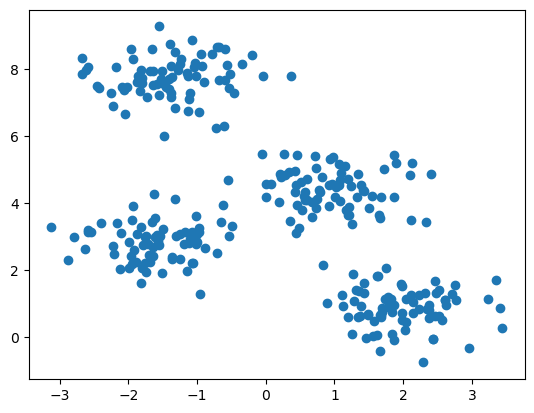

In [2]:
# geracao dos dados
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X, columns = ['x1', 'x2'])
plt.scatter(X[:,0], X[:,1])

plt.show()

In [3]:
df.head()

,x1,x2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542


In [4]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(df)

c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

In [6]:
kmeans_model.inertia_

546.8911504626299

Vamos criar uma função para calcular o WCSS

In [7]:
def calc_inercias(X, lista_k):

    lista_wcss = []

    for k in lista_k:
        # Treina o k-means para cada valor de K
        kmeans = KMeans(n_clusters=k).fit(X)
        labels_clusters = kmeans.labels_

        # ========================================
        # Cria lista com as inércias
        lista_wcss.append(kmeans.inertia_)
            
    return lista_wcss

e também uma função para criar o gráfico

In [8]:
def plot_cotovelo(lista_k, lista_wcss):
    plt.figure(figsize=(8, 5))

    plt.title("Método do cotovelo")

    plt.plot(lista_k, lista_wcss, marker="o")

    plt.xlabel("k (# de clusters)")
    plt.ylabel("Inercia (WCSS)")

    plt.show()

aplicando as funções

c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Bruno Scale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

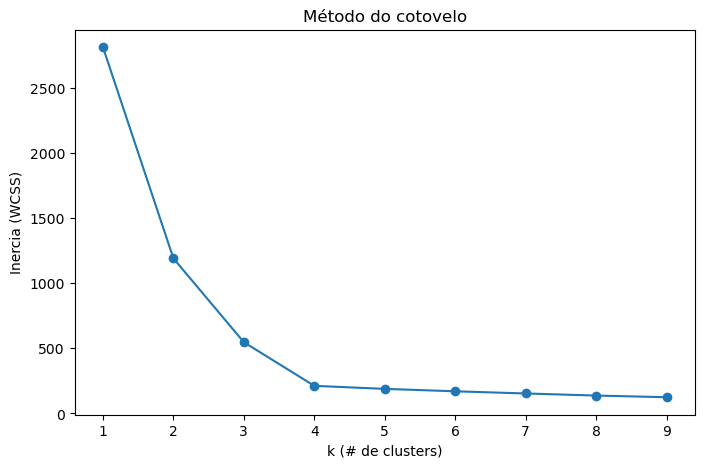

In [9]:
lista_k = range(1, 10)
lista_inercias = calc_inercias(df, lista_k)

plot_cotovelo(lista_k, lista_inercias)

## Coeficiente da Silhueta
Outro método existente para determinalção do valor ideal de K é o chamado **coeficiente da silhueta** que pode ser visto [neste link!](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) e é demonstrado nas figuras abaixo. 
  
Basicamente o coeficiente é resultante de um cálculo da distância entre os centróides, levando em consideração o agrupamento dos dados que os cerca. Após o cálculo, é gerado um gráfico em barras horizontais que mostra em cada cluster o valor do coeficiente dos dados mais próximos aos mais distantes, formando assim uma “silhueta”. O coeficiente é gerado entre o intervalo de -1 a +1, onde quanto mais próximo a “+1” representa maior distância entre os clusters; quando for “0” significa que estão muito próximos do ponto de decisão entre os clusters (ou seja, está na dúvida a qual pertence); e quando os valores forem negativos isso significa que possivelmente os dados estão no cluster errado. Também deve ser levado em consideração na análise o valor médio do coeficiente, sendo que, no cenário ideal, o coeficiente de silhueta de cada cluster deve ser maior que o valor médio do mesmo e as espessuras de cada um no gráfico devem ser semelhantes entre si.

<img src='https://miro.medium.com/v2/resize:fit:828/format:webp/1*SqMaMMzbiS9h4Jj_47akug.png'>

<img src = 'https://miro.medium.com/v2/resize:fit:828/format:webp/1*vzNSANw8qh-2GG9INGzGLQ.png'>

<img src = 'https://miro.medium.com/v2/resize:fit:828/format:webp/1*tzeZg6vMMTNpevs4Wdfo-A.png'>

<img src = 'https://miro.medium.com/v2/resize:fit:828/format:webp/1*tzeZg6vMMTNpevs4Wdfo-A.png'>

<img src = 'https://miro.medium.com/v2/resize:fit:828/format:webp/1*Eg3O6kcJiF7vAWY9RieLfw.png'>

## Mini tarefa

Usando o famoso dataset iris sem a variável target, que se encontra na pasta datasets com nome `iris_unsupervised.csv`, treine um modelo Kmeans com 3 clusters, máximo de iteração de 100 e random state como 42 e responda no [forms](https://forms.gle/ehUkKDt4oubVbsqd9) o valor da inércia para este modelo. 